# IMPORT ALL THE NECESSARY LIBARAIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from surprise import Dataset, Reader, SVD
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest 
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV  
from sklearn.pipeline import Pipeline
from matplotlib import gridspec
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import squarify
import ast
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
import warnings
import plotly.graph_objects as go
from sklearn.exceptions import ConvergenceWarning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from datetime import datetime
import squarify
%matplotlib inline

# IMPORT DATASET AND CHECK THROUGH DATA

In [2]:
# Import the Excel data file
excel_file_path = "C:/Users/Administrator/Desktop/bradford project/bisi/e-commernce data.xlsx"
data = pd.read_excel(excel_file_path)
# Display the data
print(data)

         customer_id event_type               event_time  product_id  \
0          520088904       view  2023-11-01 00:00:00 UTC     1003461   
1          530496790       view  2023-11-01 00:00:00 UTC     5000088   
2          561587266       view  2023-11-01 00:00:01 UTC    17302664   
3          518085591       view  2023-11-01 00:00:01 UTC     3601530   
4          558856683       view  2023-11-01 00:00:01 UTC     1004775   
...              ...        ...                      ...         ...   
1048570    538140974       view  2023-11-01 16:00:51 UTC     5100375   
1048571    565325552       view  2023-11-01 16:00:51 UTC     1005099   
1048572    513687012       view  2023-11-01 16:00:52 UTC     6000254   
1048573    514317487       view  2023-11-01 16:00:52 UTC    28102605   
1048574    516192167       view  2023-11-01 16:00:52 UTC     1004209   

          category_id                   category           brand   price  \
0        2.053014e+18     electronics.smartphone          x

In [3]:
# display the dataframe
data.head()

,customer_id,event_type,event_time,product_id,category_id,category,brand,price,user_session
0,520088904,view,2023-11-01 00:00:00 UTC,1003461,2.053014e+18,electronics.smartphone,xiaomi,489.07,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,530496790,view,2023-11-01 00:00:00 UTC,5000088,2.053014e+18,appliances.sewing_machine,janome,293.65,8e5f4f83-366c-4f70-860e-ca7417414283
2,561587266,view,2023-11-01 00:00:01 UTC,17302664,2.053014e+18,NaN,creed,28.31,755422e7-9040-477b-9bd2-6a6e8fd97387
3,518085591,view,2023-11-01 00:00:01 UTC,3601530,2.053014e+18,appliances.kitchen.washer,lg,712.87,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,558856683,view,2023-11-01 00:00:01 UTC,1004775,2.053014e+18,electronics.smartphone,xiaomi,183.27,313628f1-68b8-460d-84f6-cec7a8796ef2


In [4]:
data.shape

(1048575, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   customer_id   1048575 non-null  int64  
 1   event_type    1048575 non-null  object 
 2   event_time    1048575 non-null  object 
 3   product_id    1048575 non-null  int64  
 4   category_id   1048575 non-null  float64
 5   category      716498 non-null   object 
 6   brand         894260 non-null   object 
 7   price         1048575 non-null  float64
 8   user_session  1048575 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 72.0+ MB


# DESCRIPTIVE STATISTICS 

In [6]:
# Select the numerical columns
numerical_columns = data.select_dtypes(include=['float', 'int'])

# Calculate descriptive statistics
descriptive_stats = numerical_columns.describe()

# Print the descriptive statistics
print(descriptive_stats)

        customer_id    product_id   category_id         price
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06
mean   5.352223e+08  1.062323e+07  2.057570e+18  2.925054e+02
std    2.015196e+07  1.202236e+07  1.895891e+16  3.478039e+02
min    2.749691e+08  1.000978e+06  2.053014e+18  0.000000e+00
25%    5.159398e+08  1.005186e+06  2.053014e+18  6.976000e+01
50%    5.307890e+08  4.900337e+06  2.053014e+18  1.721900e+02
75%    5.545297e+08  1.570018e+07  2.053014e+18  3.621000e+02
max    5.665139e+08  6.170001e+07  2.180737e+18  2.574070e+03


In [7]:
 #categorical_column(s) in dataset
categorical_columns = ['category', 'price', 'event_type','brand']

for column in categorical_columns:
    column_stats = data[column].value_counts()  
    total_count = column_stats.sum()  
    unique_count = column_stats.size  
    mode = column_stats.idxmax()  
    mode_count = column_stats.max()  
    mode_percentage = mode_count / total_count * 100  
    print(f"Column: {column}")
    print(f"Total count: {total_count}")
    print(f"Unique count: {unique_count}")
    print(f"Mode: {mode}")
    print(f"Mode count: {mode_count}")
    print(f"Mode percentage: {mode_percentage:.2f}%")
    print("----------------------")

Column: category
Total count: 716498
Unique count: 123
Mode: electronics.smartphone
Mode count: 283400
Mode percentage: 39.55%
----------------------
Column: price
Total count: 1048575
Unique count: 19144
Mode: 128.42
Mode count: 8396
Mode percentage: 0.80%
----------------------
Column: event_type
Total count: 1048575
Unique count: 3
Mode: view
Mode count: 1014762
Mode percentage: 96.78%
----------------------
Column: brand
Total count: 894260
Unique count: 2668
Mode: samsung
Mode count: 131900
Mode percentage: 14.75%
----------------------


# CHECKING FOR MISSING VALUES

In [8]:
# Check for missing values in the DataFrame
missing_values = data.isnull().sum()
# Check for missing values in specific columns
missing_values_per_column = data.isnull().sum()
# Print the results
print("Missing Values in the DataFrame:")
print(missing_values)
print("\nMissing Values in Specific Columns:")
print(missing_values_per_column)

Missing Values in the DataFrame:
customer_id          0
event_type           0
event_time           0
product_id           0
category_id          0
category        332077
brand           154315
price                0
user_session         0
dtype: int64

Missing Values in Specific Columns:
customer_id          0
event_type           0
event_time           0
product_id           0
category_id          0
category        332077
brand           154315
price                0
user_session         0
dtype: int64


In [9]:
# Imputing missing values for categorical columns
categorical_cols = ['brand','category']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Checking for missing values again to verify the changes
missing_values_after_handling = data.isnull().sum()
print(missing_values_after_handling)

customer_id     0
event_type      0
event_time      0
product_id      0
category_id     0
category        0
brand           0
price           0
user_session    0
dtype: int64


# EXPLORATORY DATA ANALYSIS (EDA)

In [10]:
def convert_time_to_date(utc_timestamp):    
    '''covert utc timestamp string to date yyyy-mm-dd format in datetime object
    
    Parameters: 
        utc_timestamp (str): utc timestamp string is to be converted.
    
    Returns:
        utc_date (datetime): datetime object for date in format yyyy-mm-dd
    '''
    
    utc_date = datetime.strptime(utc_timestamp[0:10], '%Y-%m-%d').date()
    return utc_date   

In [11]:
# Due to the amount of data, datetime conversion takes a while....
data['event_date'] = data['event_time'].apply(lambda s: convert_time_to_date(s))
visitor_by_date = data[['event_date','customer_id']].drop_duplicates().groupby(['event_date'])['customer_id'].agg(['count']).sort_values(by=['event_date'])

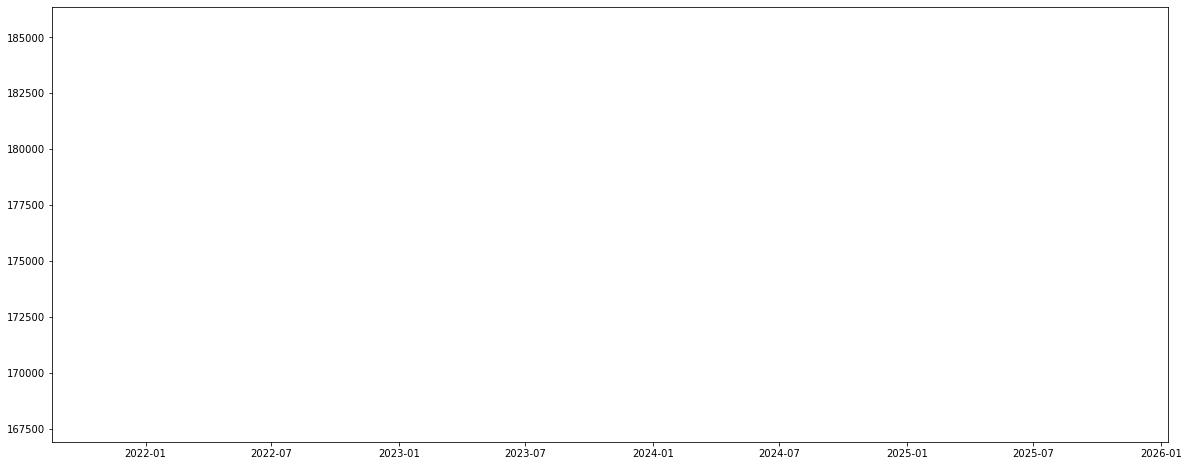

In [12]:
x = pd.Series(visitor_by_date.index.values)
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)
plt.plot(x,y)
plt.show()

In [13]:
# daily price trend
product_id = 1003461 # Enter product_id
data[data['product_id'] == product_id][['category','brand']].head(1)

,category,brand
0,electronics.smartphone,xiaomi


In [14]:
product_daily_price = data.loc[data['product_id'] == product_id,['event_date','price']].groupby(['event_date']).mean()
product_daily_price = data[['event_date','price']].groupby(['event_date']).mean()

In [15]:
#how many customers visted the site
visitor = data['customer_id'].nunique()
print ("visitors: {}".format(visitor))

visitors: 176639


In [16]:
data['brand'].value_counts()
data['event_type'].value_counts()

view        1014762
purchase      18368
cart          15445
Name: event_type, dtype: int64

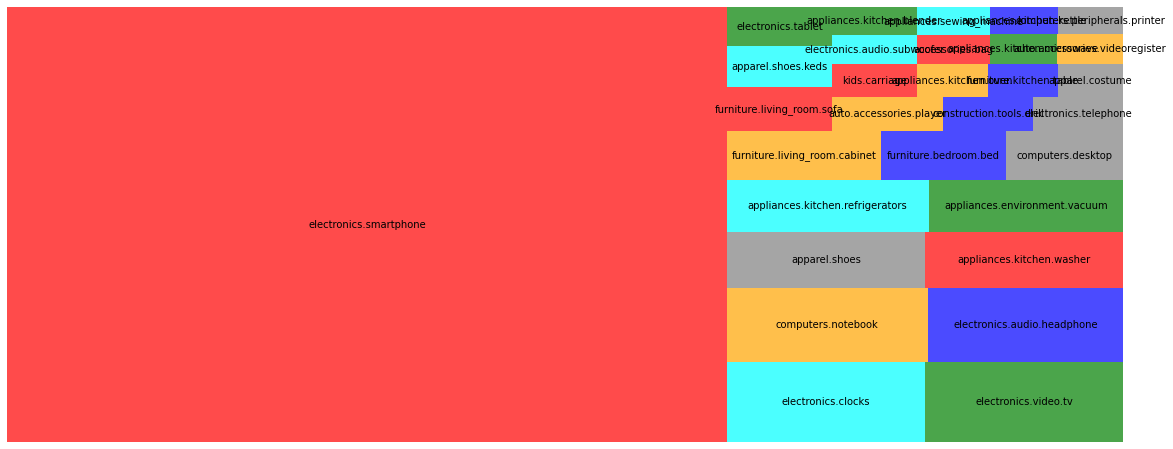

In [17]:
#by category and product
top_category_n = 30
top_category = data['category'].value_counts()[:top_category_n].sort_values(ascending=False)
df = pd.DataFrame({'count':top_category, 'top_category':top_category })

squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

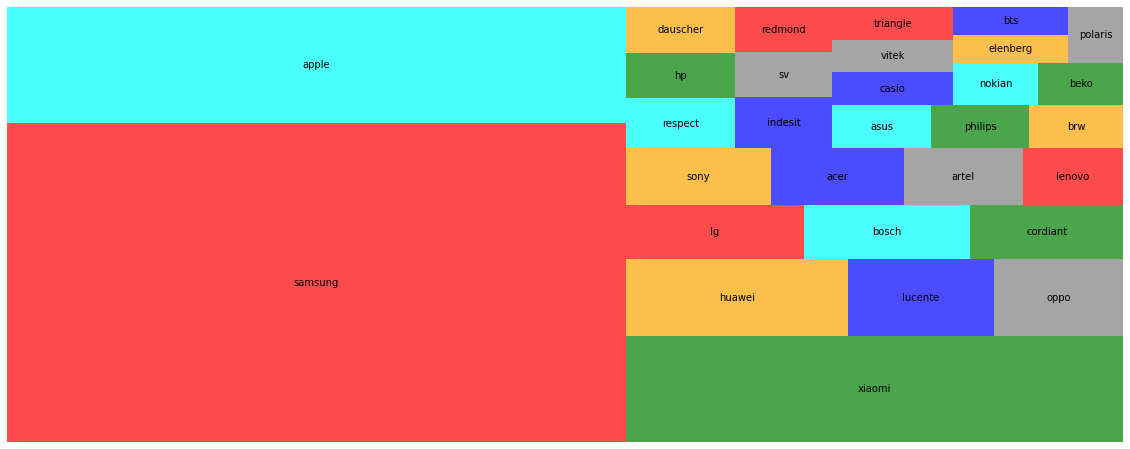

In [18]:
top_brand_n = 30
top_brand = data['brand'].value_counts()[:top_brand_n].sort_values(ascending=False)
df = pd.DataFrame({'count':top_brand, 'top_category':top_brand.index.array })

squarify.plot(sizes=top_brand, label=top_brand.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

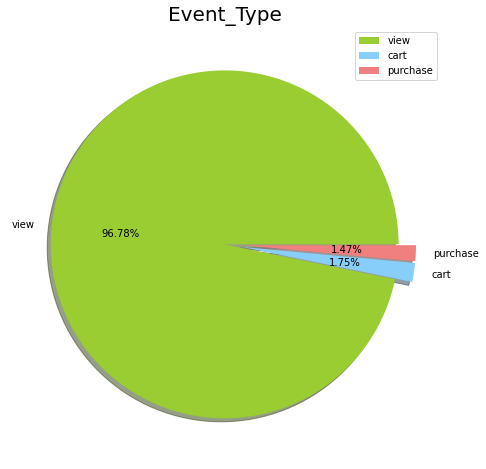

In [19]:
labels = ['view', 'cart','purchase']
size = data['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [20]:
#items that customer bought
purchase = data.loc[data['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase

,customer_id,event_type,event_time,product_id,category_id,category,brand,price,user_session,event_date
107,559368633,purchase,2023-11-01 00:00:41 UTC,13200605,2.053014e+18,furniture.bedroom.bed,samsung,566.30,d6034fa2-41fb-4ac0-9051-55ea9fc9147a,2023-11-01
168,513351129,purchase,2023-11-01 00:01:04 UTC,1005161,2.053014e+18,electronics.smartphone,xiaomi,211.92,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2023-11-01
707,562958505,purchase,2023-11-01 00:04:51 UTC,1004856,2.053014e+18,electronics.smartphone,samsung,128.42,0f039697-fedc-40fa-8830-39c1a024351d,2023-11-01
811,541854711,purchase,2023-11-01 00:05:34 UTC,26401669,2.053014e+18,electronics.smartphone,lucente,109.66,c41c44d5-ef9b-41b9-9cd6-8d96dda6e927,2023-11-01
939,557746614,purchase,2023-11-01 00:06:33 UTC,1801881,2.053014e+18,electronics.video.tv,samsung,488.80,4d76d6d3-fff5-4880-8327-e9e57b618e0e,2023-11-01
...,...,...,...,...,...,...,...,...,...,...
1048241,564288950,purchase,2023-11-01 16:00:40 UTC,26401412,2.053014e+18,electronics.smartphone,lucente,170.40,67bb0a79-a34d-49d1-98d8-54d99468fce1,2023-11-01
1048269,560088108,purchase,2023-11-01 16:00:41 UTC,1004238,2.053014e+18,electronics.smartphone,apple,1235.30,bb36b08d-f80a-412f-89c3-11761040d400,2023-11-01
1048452,521490616,purchase,2023-11-01 16:00:48 UTC,1201255,2.172371e+18,electronics.tablet,huawei,179.90,dc9e4b23-0334-41e5-9360-612c6eaa0c98,2023-11-01
1048499,543842615,purchase,2023-11-01 16:00:49 UTC,1005121,2.053014e+18,electronics.smartphone,apple,969.18,f965c7b4-bc1e-42f3-b06c-a81d1919fad6,2023-11-01


In [21]:
#top buy by customer
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
samsung,5811
apple,3568
xiaomi,1327
huawei,502
cordiant,378
oppo,307
lucente,269
lg,213
nokian,190


In [22]:
#users journey
user_session = 520088904
data.loc[data['customer_id'] == user_session]

,customer_id,event_type,event_time,product_id,category_id,category,brand,price,user_session,event_date
0,520088904,view,2023-11-01 00:00:00 UTC,1003461,2.053014e+18,electronics.smartphone,xiaomi,489.07,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2023-11-01
95,520088904,view,2023-11-01 00:00:36 UTC,1004184,2.053014e+18,electronics.smartphone,xiaomi,463.15,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2023-11-01
121,520088904,view,2023-11-01 00:00:47 UTC,1003461,2.053014e+18,electronics.smartphone,xiaomi,489.07,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2023-11-01
131,520088904,view,2023-11-01 00:00:50 UTC,1005234,2.053014e+18,electronics.smartphone,xiaomi,398.72,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2023-11-01
263,520088904,view,2023-11-01 00:01:48 UTC,1003898,2.053014e+18,electronics.smartphone,oneplus,540.30,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2023-11-01
329,520088904,view,2023-11-01 00:02:17 UTC,1003898,2.053014e+18,electronics.smartphone,oneplus,540.30,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2023-11-01
352,520088904,view,2023-11-01 00:02:24 UTC,1003499,2.053014e+18,electronics.smartphone,oneplus,461.61,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2023-11-01
397,520088904,view,2023-11-01 00:02:41 UTC,1003499,2.053014e+18,electronics.smartphone,oneplus,461.61,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2023-11-01
416,520088904,view,2023-11-01 00:02:48 UTC,1003898,2.053014e+18,electronics.smartphone,oneplus,540.30,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2023-11-01
6378,520088904,view,2023-11-01 00:38:37 UTC,1701552,2.053014e+18,computers.peripherals.monitor,acer,217.51,bbd7ce29-5406-4c52-b239-f0dd3b12427e,2023-11-01


# FEATURE ENGINERRING

In [23]:
#predict if a customer will buy a product after adding to a cart
cart_purchase_users = data.loc[data["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['customer_id'])
cart_purchase_users.dropna(how='any', inplace=True)

In [24]:
cart_purchase_users_all_activity = data.loc[data['customer_id'].isin(cart_purchase_users['customer_id'])]

In [25]:
#Prepare a dataframe for counting and checking activity in the session
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})

In [26]:
df_targets = data.loc[data["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'customer_id',
'user_session'])
df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)
df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")
df_targets = df_targets.loc[df_targets["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])
df_targets['event_weekday'] = df_targets['event_date'].apply(lambda s: s.weekday())
df_targets.dropna(how='any', inplace=True)
df_targets["category_level1"] = df_targets["category"].str.split(".",expand=True)[0].astype('category')
df_targets["category_level2"] = df_targets["category"].str.split(".",expand=True)[1].astype('category')

In [27]:
df_targets = df_targets.merge(activity_in_session, on='user_session', how='left')
df_targets['activity_count'] = df_targets['activity_count'].fillna(0)
df_targets.head()

,customer_id,event_type,event_time,product_id,category_id,category,brand,price,user_session,event_date,is_purchased,event_weekday,category_level1,category_level2,activity_count
0,533326659,cart,2023-11-01 00:00:14 UTC,1005014,2.053014e+18,electronics.smartphone,samsung,503.09,6b928be2-2bce-4640-8296-0efdf2fda22a,2023-11-01,0,2,electronics,smartphone,1
1,557746614,cart,2023-11-01 00:03:24 UTC,1801881,2.053014e+18,electronics.video.tv,samsung,488.80,4d76d6d3-fff5-4880-8327-e9e57b618e0e,2023-11-01,1,2,electronics,video,25
2,565865924,cart,2023-11-01 00:03:39 UTC,1005115,2.053014e+18,electronics.smartphone,apple,949.47,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,2023-11-01,0,2,electronics,smartphone,2
3,549256216,cart,2023-11-01 00:05:54 UTC,1002542,2.053014e+18,electronics.smartphone,apple,486.80,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,2023-11-01,0,2,electronics,smartphone,14
4,513645631,cart,2023-11-01 00:06:38 UTC,1004856,2.053014e+18,electronics.smartphone,samsung,128.42,61ceaf50-820a-4858-9a68-bab804d47a22,2023-11-01,1,2,electronics,smartphone,9


In [28]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10668 entries, 0 to 10667
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   customer_id      10668 non-null  int64   
 1   event_type       10668 non-null  object  
 2   event_time       10668 non-null  object  
 3   product_id       10668 non-null  int64   
 4   category_id      10668 non-null  float64 
 5   category         10668 non-null  object  
 6   brand            10668 non-null  object  
 7   price            10668 non-null  float64 
 8   user_session     10668 non-null  object  
 9   event_date       10668 non-null  object  
 10  is_purchased     10668 non-null  int32   
 11  event_weekday    10668 non-null  int64   
 12  category_level1  10668 non-null  category
 13  category_level2  10668 non-null  category
 14  activity_count   10668 non-null  int64   
dtypes: category(2), float64(2), int32(1), int64(4), object(6)
memory usage: 1.1+ MB


In [29]:
df_targets.to_excel('training_data.xlsx')
df_targets = pd.read_excel('training_data.xlsx')

In [30]:
#working on inbalance in trainig
is_purcahase_set = df_targets[df_targets['is_purchased']== 1]
is_purcahase_set.shape[0]

5725

In [31]:
not_purcahase_set = df_targets[df_targets['is_purchased']== 0]
not_purcahase_set.shape[0]

4943

In [32]:
n_samples = 4943  # Reduce the number of samples
is_purchase_downsampled = resample(is_purcahase_set,
                                   replace=False,
                                   n_samples=n_samples,
                                   random_state=27)
not_purchase_set_downsampled = resample(not_purcahase_set,
                                        replace=False,
                                        n_samples=n_samples,
                                        random_state=27)

In [33]:
downsampled = pd.concat([is_purchase_downsampled, not_purchase_set_downsampled])
downsampled['is_purchased'].value_counts()

1    4943
0    4943
Name: is_purchased, dtype: int64

In [38]:
features = downsampled[['brand', 'price', 'event_weekday', 'category_level1', 'category_level2', 'activity_count']]

In [39]:
#Encode categorical variables
features.loc[:, 'brand'] = LabelEncoder().fit_transform(downsampled.loc[:, 'brand'].copy())
features.loc[:, 'event_weekday'] = LabelEncoder().fit_transform(downsampled.loc[:, 'event_weekday'].copy())
features.loc[:, 'category_level1'] = LabelEncoder().fit_transform(downsampled.loc[:, 'category_level1'].copy())
features.loc[:, 'category_level2'] = LabelEncoder().fit_transform(downsampled.loc[:, 'category_level2'].copy())

is_purchased = LabelEncoder().fit_transform(downsampled['is_purchased'])
features.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2968\3956621559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.loc[:, 'brand'] = LabelEncoder().fit_transform(downsampled.loc[:, 'brand'].copy())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2968\3956621559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.loc[:, 'event_weekday'] = LabelEncoder().fit_transform(downsampled.loc[:, 'event_weekday'].copy())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2968\3956621559.py:4

,brand,price,event_weekday,category_level1,category_level2,activity_count
1446,7,928.18,0,6,26,6
2118,61,52.41,0,6,26,5
6427,7,160.06,0,6,1,4
1239,7,317.67,0,6,9,7
5060,130,192.53,0,6,26,10


In [40]:
# Separate customers who made a purchase and customers who did not make a purchase
click_and_buy = downsampled[downsampled['is_purchased'] == 1]
click_and_not_buy = downsampled[downsampled['is_purchased'] == 0]

# Select the features for clustering (you can choose different features if needed)
click_and_buy_features = click_and_buy[['brand', 'price', 'event_weekday', 'category_level1', 'category_level2', 'activity_count']]
click_and_not_buy_features = click_and_not_buy[['brand', 'price', 'event_weekday', 'category_level1', 'category_level2', 'activity_count']]

In [41]:
# Encode categorical variables for both groups
click_and_buy_features.loc[:, 'brand'] = LabelEncoder().fit_transform(click_and_buy.loc[:, 'brand'].copy())
click_and_buy_features.loc[:, 'event_weekday'] = LabelEncoder().fit_transform(click_and_buy.loc[:, 'event_weekday'].copy())
click_and_buy_features.loc[:, 'category_level1'] = LabelEncoder().fit_transform(click_and_buy.loc[:, 'category_level1'].copy())
click_and_buy_features.loc[:, 'category_level2'] = LabelEncoder().fit_transform(click_and_buy.loc[:, 'category_level2'].copy())

click_and_not_buy_features.loc[:, 'brand'] = LabelEncoder().fit_transform(click_and_not_buy.loc[:, 'brand'].copy())
click_and_not_buy_features.loc[:, 'event_weekday'] = LabelEncoder().fit_transform(click_and_not_buy.loc[:, 'event_weekday'].copy())
click_and_not_buy_features.loc[:, 'category_level1'] = LabelEncoder().fit_transform(click_and_not_buy.loc[:, 'category_level1'].copy())
click_and_not_buy_features.loc[:, 'category_level2'] = LabelEncoder().fit_transform(click_and_not_buy.loc[:, 'category_level2'].copy())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2968\2548687437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_and_buy_features.loc[:, 'brand'] = LabelEncoder().fit_transform(click_and_buy.loc[:, 'brand'].copy())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2968\2548687437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_and_buy_features.loc[:, 'event_weekday'] = LabelEncoder().fit_transform(click_and_buy.loc[:, 'event_weekday'].copy())
C:\Users\Administrator\AppData\Local\Tem

In [42]:
# Perform K-means clustering for both groups
n_clusters = 3
kmeans_click_and_buy = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_click_and_buy.fit(click_and_buy_features)

kmeans_click_and_not_buy = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_click_and_not_buy.fit(click_and_not_buy_features)

# Get the cluster labels for both groups
click_and_buy_cluster_labels = kmeans_click_and_buy.labels_
click_and_not_buy_cluster_labels = kmeans_click_and_not_buy.labels_

# Add the cluster labels to the corresponding dataframes
click_and_buy['cluster_label'] = click_and_buy_cluster_labels
click_and_not_buy['cluster_label'] = click_and_not_buy_cluster_labels

# Print the count of samples in each cluster for both groups
print("Click and Buy Cluster Counts:")
print(click_and_buy['cluster_label'].value_counts())

print("Click and Not Buy Cluster Counts:")
print(click_and_not_buy['cluster_label'].value_counts())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Click and Buy Cluster Counts:
2    3195
0    1049
1     699
Name: cluster_label, dtype: int64
Click and Not Buy Cluster Counts:
0    3837
2     838
1     268
Name: cluster_label, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2968\296132754.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_and_buy['cluster_label'] = click_and_buy_cluster_labels
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2968\296132754.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_and_not_buy['cluster_label'] = click_and_not_buy_cluster_labels


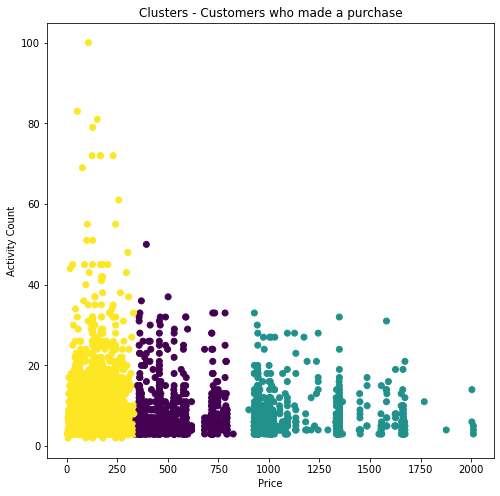

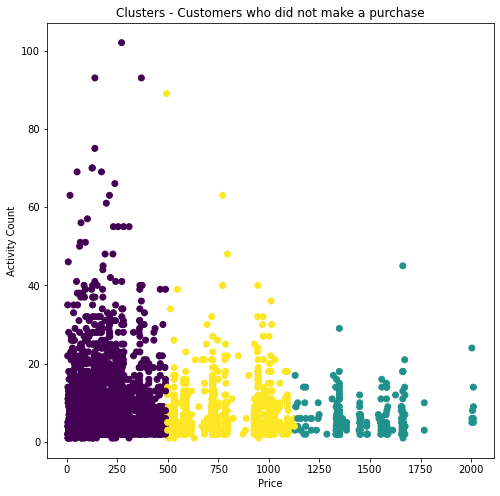

In [43]:
# Plot the clusters for customers who made a purchase
plt.scatter(click_and_buy_features['price'], click_and_buy_features['activity_count'], c=click_and_buy_cluster_labels)
plt.xlabel('Price')
plt.ylabel('Activity Count')
plt.title('Clusters - Customers who made a purchase')
plt.show()

# Plot the clusters for customers who did not make a purchase
plt.scatter(click_and_not_buy_features['price'], click_and_not_buy_features['activity_count'], c=click_and_not_buy_cluster_labels)
plt.xlabel('Price')
plt.ylabel('Activity Count')
plt.title('Clusters - Customers who did not make a purchase')
plt.show()

In [44]:
#Modeling
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    is_purchased, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [45]:
# Define the target variable
target = downsampled['is_purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.5839514497639919
Precision: 0.5684523809523809
Recall: 0.6523224043715847
F1-Score: 0.6075063613231553


(0.0, 1.0)

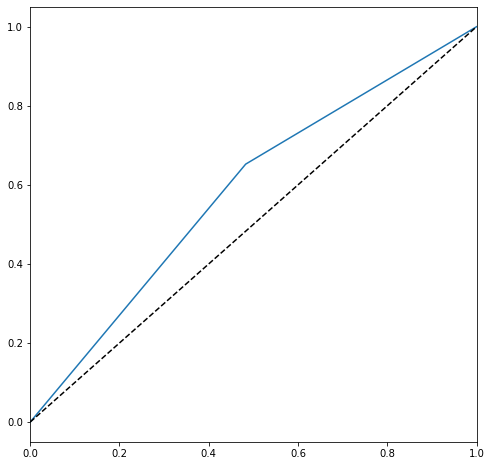

In [45]:
#Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Compute the Area Under the Curve (AUC) for ROC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])

In [46]:
# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.5296695886716116
Precision: 0.533724340175953
Recall: 0.3729508196721312
F1-Score: 0.43908323281061523


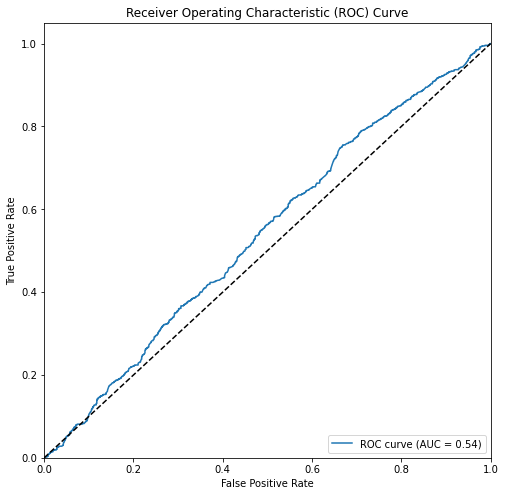

In [47]:
# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [48]:
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
#evaluate perfoemance
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.6186783546864464
Precision: 0.5882352941176471
Recall: 0.7581967213114754
fbeta: 0.6195021985616759


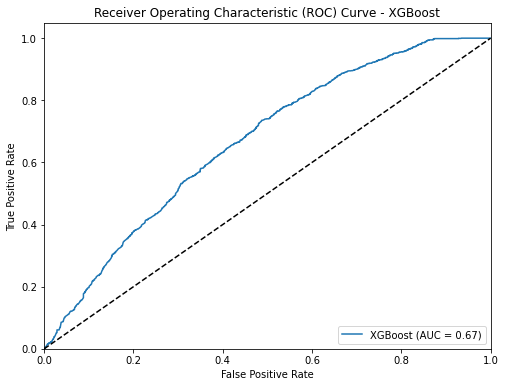

In [50]:
# Calculate predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

In [51]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

# Evaluate KNN performance
print("KNN Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
print("KNN Precision:", metrics.precision_score(y_test, knn_y_pred))
print("KNN Recall:", metrics.recall_score(y_test, knn_y_pred))
print("KNN F-beta:", metrics.fbeta_score(y_test, knn_y_pred, average='weighted', beta=0.5))

KNN Accuracy: 0.569453809844909
KNN Precision: 0.5569774527726996
KNN Recall: 0.6243169398907104
KNN F-beta: 0.5694742329115137


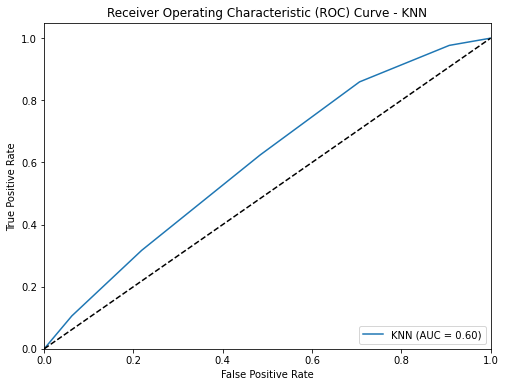

In [52]:
# Calculate predicted probabilities
knn_y_pred_prob = knn_model.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_pred_prob)

# Compute Area Under the Curve (AUC)
knn_roc_auc = auc(knn_fpr, knn_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()

In [53]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Evaluate Decision Tree performance
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, dt_y_pred))
print("Decision Tree Precision:", metrics.precision_score(y_test, dt_y_pred))
print("Decision Tree Recall:", metrics.recall_score(y_test, dt_y_pred))
print("Decision Tree F-beta:", metrics.fbeta_score(y_test, dt_y_pred, average='weighted', beta=0.5))

Decision Tree Accuracy: 0.5738368172623062
Decision Tree Precision: 0.5636132315521628
Decision Tree Recall: 0.605191256830601
Decision Tree F-beta: 0.5739815530692907


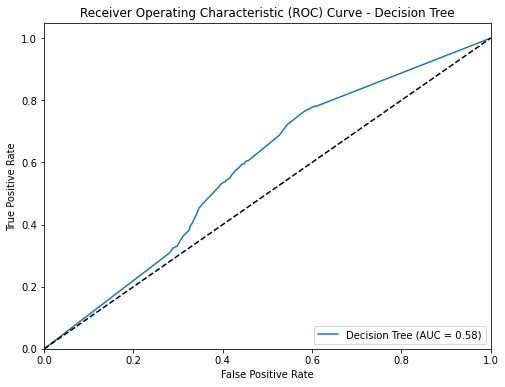

In [54]:
# Calculate predicted probabilities
dt_y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_y_pred_prob)

# Compute Area Under the Curve (AUC)
dt_roc_auc = auc(dt_fpr, dt_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

In [55]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

# Evaluate SVM performance
print("SVM Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
print("SVM Precision:", metrics.precision_score(y_test, svm_y_pred))
print("SVM Recall:", metrics.recall_score(y_test, svm_y_pred))
print("SVM F-beta:", metrics.fbeta_score(y_test, svm_y_pred, average='weighted', beta=0.5))

SVM Accuracy: 0.540458530006743
SVM Precision: 0.5213711383834109
SVM Recall: 0.8415300546448088
SVM F-beta: 0.5185455857361354


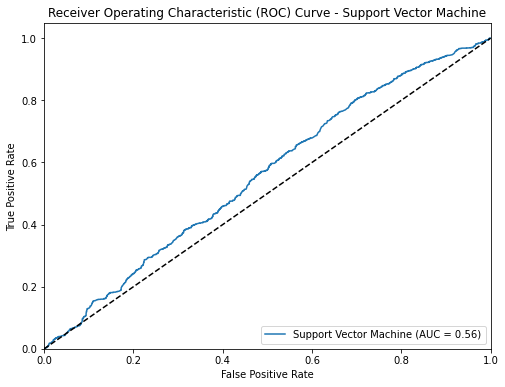

In [56]:
# Calculate predicted probabilities
svm_y_pred_prob = svm_model.decision_function(X_test)

# Compute false positive rate, true positive rate, and thresholds
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_pred_prob)

# Compute Area Under the Curve (AUC)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label=f'Support Vector Machine (AUC = {svm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

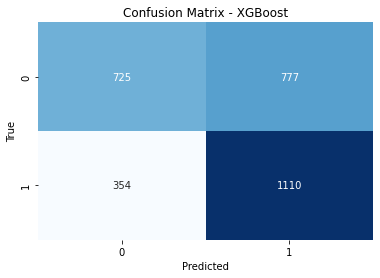

In [59]:
# Get the true and predicted values for XGBoost
y_true = y_test
y_pred = xgb_model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGBoost')
plt.show()

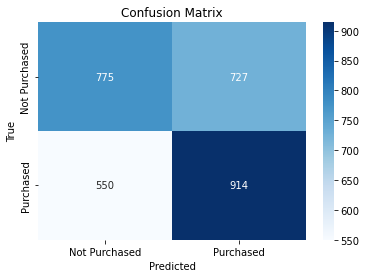

In [60]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Purchased", "Purchased"], yticklabels=["Not Purchased", "Purchased"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

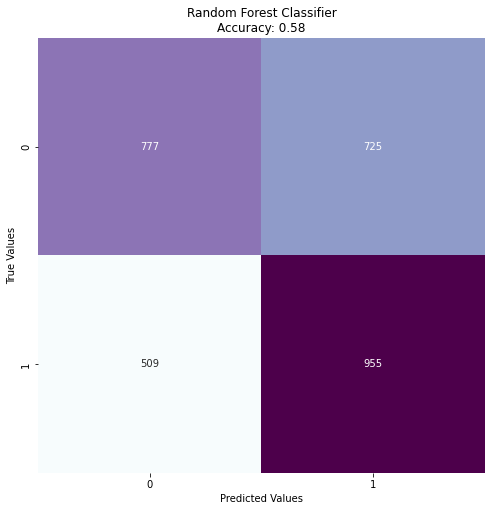

In [63]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy and create a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for True and Predicted values
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title(f'Random Forest Classifier\nAccuracy: {accuracy:.2f}')
plt.show()

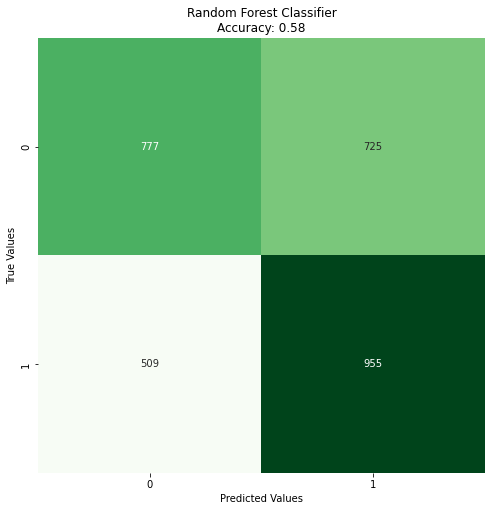

In [62]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy and create a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for True and Predicted values
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title(f'Random Forest Classifier\nAccuracy: {accuracy:.2f}')
plt.show()

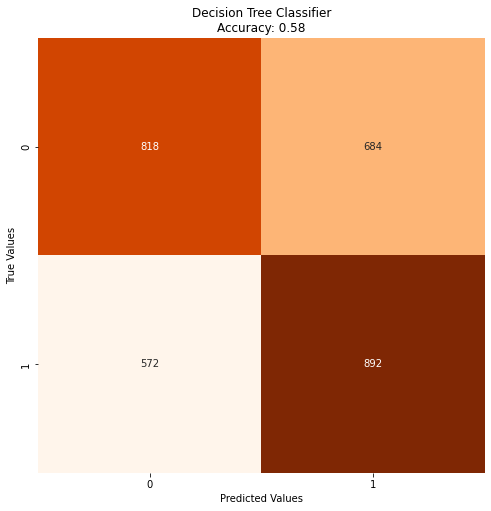

In [64]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate accuracy and create a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for True and Predicted values
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title(f'Decision Tree Classifier\nAccuracy: {accuracy:.2f}')
plt.show()

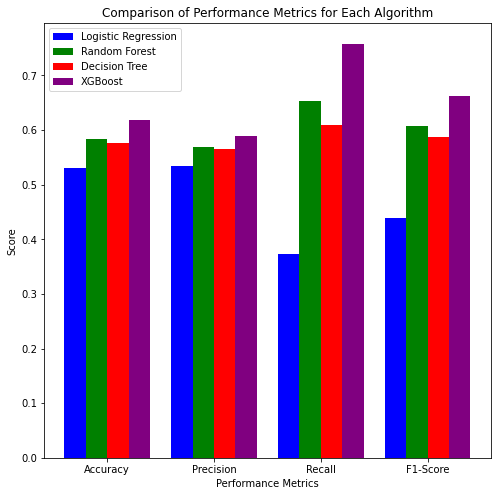

In [69]:
# Define the target variable
target = downsampled['is_purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set for Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions on the test set for Random Forest
y_pred_rf = rf_model.predict(X_test)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

# Make predictions on the test set for Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set for XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the performance metrics for each model
metrics_lr = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr)
}

metrics_rf = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf)
}

metrics_dt = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt)
}

metrics_xgb = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb)
}

# Create a bar plot to compare the performance metrics for each algorithm
labels = list(metrics_lr.keys())
lr_values = list(metrics_lr.values())
rf_values = list(metrics_rf.values())
dt_values = list(metrics_dt.values())
xgb_values = list(metrics_xgb.values())

x = range(len(labels))

plt.bar(x, lr_values, width=0.2, label='Logistic Regression', color='b', align='center')
plt.bar([i + 0.2 for i in x], rf_values, width=0.2, label='Random Forest', color='g', align='center')
plt.bar([i + 0.4 for i in x], dt_values, width=0.2, label='Decision Tree', color='r', align='center')
plt.bar([i + 0.6 for i in x], xgb_values, width=0.2, label='XGBoost', color='purple', align='center')

plt.xticks([i + 0.3 for i in x], labels)
plt.xlabel('Performance Metrics')
plt.ylabel('Score')
plt.title('Comparison of Performance Metrics for Each Algorithm')
plt.legend()
plt.show()

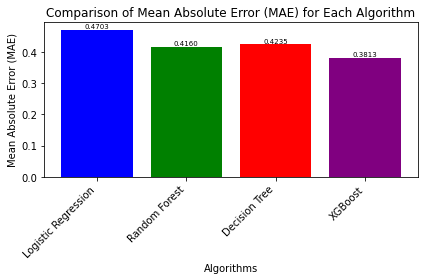

In [81]:
# Calculate the Mean Absolute Error for each model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Create a bar plot to compare the MAE values for each algorithm
algorithms = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost']
mae_values = [mae_lr, mae_rf, mae_dt, mae_xgb]

plt.bar(algorithms, mae_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Algorithms')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) for Each Algorithm')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with their respective MAE values
for i in range(len(algorithms)):
    plt.text(i, mae_values[i] + 0.001, f'{mae_values[i]:.4f}', ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.show()

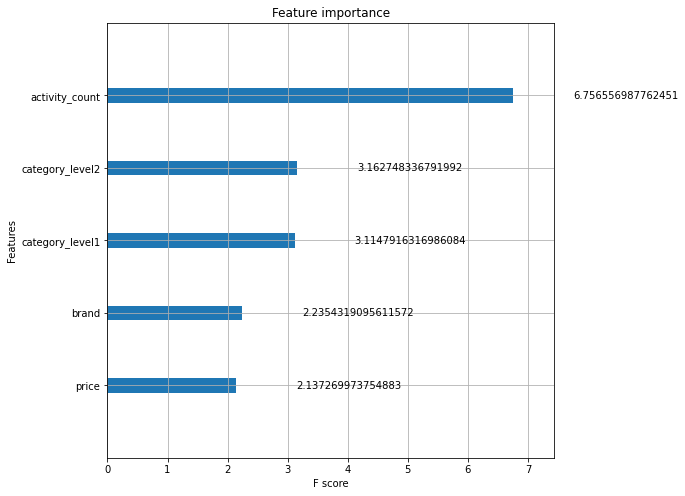

In [56]:
#feature importance
plot_importance(model, max_num_features=10, importance_type ='gain')
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

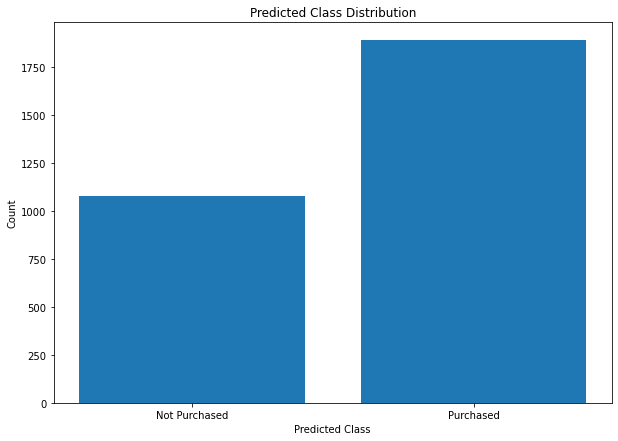

In [58]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize the predicted values
unique_classes, class_counts = np.unique(y_pred, return_counts=True)

plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes, ['Not Purchased', 'Purchased'])
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.title('Predicted Class Distribution')
plt.show()
